In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

In [24]:
def multi_plot(data1, data2, data3, data4, data5, data6, title, labels, n_threads):
    fig, ax = plt.subplots(figsize=[10, 10])

    boxes = []
    colors = []
    group_positions = []

    # 6 colori per 6 dataset
    color_map = ["peachpuff", "orange", "yellow", "blue", "lightgreen", "violet"]

    for i in range(len(n_threads)):
        boxes.extend([data1[i], data2[i], data3[i], data4[i], data5[i], data6[i]])
        colors.extend(color_map)
        # Ogni gruppo di 6 box → centro a 6*i + 3.5
        group_center = 6 * i + 3.5
        group_positions.append(group_center)

    # Boxplot
    bplot = ax.boxplot(boxes, showfliers=False, patch_artist=True)

    # Colori box
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # Etichette sugli assi
    ax.set_xticks(group_positions)
    ax.set_xticklabels([str(n) for n in n_threads])

    ax.set_ylabel('Microseconds')
    ax.set_xlabel('n_threads')
    ax.set_title(title, loc='left')
    ax.set_yscale('log')

    # Legenda (solo il primo gruppo di 6 box)
    legend_handles = [bplot["boxes"][i] for i in range(6)]
    ax.legend(legend_handles, labels, loc='upper right')

    # Mediane rosse
    for median in bplot['medians']:
        median.set_color('red')

    # Info run
    plt.figtext(
        0.54, 0.98,
        f"threadpool: size_queue({size_queue})\n"
        f"setup: number total job {n_elems}, n_operation_in_single_job {n_body_function}/ {n_body_function*4}\n"
        f"runs: {n_runs}",
        fontsize=9,
        bbox=dict(facecolor='white', edgecolor='black')
    )

    plt.tight_layout()
    plt.show()

    # ===== Median values =====
    print(f"\n=== Median values for {title} ===")
    medians = [np.median(b) for b in boxes]

    for i, n in enumerate(n_threads):
        print(f"\nThreads = {n}")
        for j, label in enumerate(labels):
            idx = i * 6 + j
            print(f"  {label:>12}: {medians[idx]:.2f}")


In [25]:
import pandas as pd

# Leggi tutto come stringa (per ora)
with open("send_steal_clusterStudeti_run40_njob_4096_opinjobsmall15000_bigx4_thread12468.txt", "r") as f:
    lines = f.readlines()

# Processa ogni riga
data = []
for line in lines:
    parts = line.split()            # dividi per spazi
    send_steal, thread = parts[:2]   # prime 3 colonne
    valori = list(map(int, parts[2:]))      # tutti i restanti valori in lista
    data.append([send_steal, thread, valori])

# Crea DataFrame
df = pd.DataFrame(data, columns=["send_steal","thread", "valori"])

# Visualizza
print(df.head())

send_steal = ["mostfree_mostbusy","mostfree_random","mostfree_random_half","round_mostbusy","round_random","round_random_half"]
thread = ["thread_1", "thread_2","thread_4","thread_6","thread_8"]

for c in send_steal:
    for t in thread:
        subset = df[(df["send_steal"]==c) & (df["thread"]==t)]
        if not subset.empty:
            valori = subset.iloc[0]["valori"]
            # Crea variabile dinamica
            nome_var = f"{c}_{t}"
            globals()[nome_var] = valori
# ===================== CONCATENAZIONE =====================
round_random_multi = [
    round_random_thread_1,
    round_random_thread_2,
    round_random_thread_4,
    round_random_thread_6,
    round_random_thread_8,
    # round_random_thread_16,
    # round_random_thread_32,
    # round_random_thread_64
]

round_random_half_multi = [
    round_random_half_thread_1,
    round_random_half_thread_2,
    round_random_half_thread_4,
    round_random_half_thread_6,
    round_random_half_thread_8,
    # round_random_half_thread_16,
    # round_random_half_thread_32,
    # round_random_half_thread_64
]

round_mostbusy_multi = [
    round_mostbusy_thread_1,
    round_mostbusy_thread_2,
    round_mostbusy_thread_4,
    round_mostbusy_thread_6,
    round_mostbusy_thread_8,
    # round_mostbusy_thread_16,
    # round_mostbusy_thread_32,
    # round_mostbusy_thread_64
]

mostfree_random_multi = [
    mostfree_random_thread_1,
    mostfree_random_thread_2,
    mostfree_random_thread_4,
    mostfree_random_thread_6,
    mostfree_random_thread_8,
    # mostfree_random_thread_16,
    # mostfree_random_thread_32,
    # mostfree_random_thread_64
]

mostfree_random_half_multi = [
    mostfree_random_half_thread_1,
    mostfree_random_half_thread_2,
    mostfree_random_half_thread_4,
    mostfree_random_half_thread_6,
    mostfree_random_half_thread_8,
    # mostfree_random_half_thread_16,
    # mostfree_random_half_thread_32,
    # mostfree_random_half_thread_64
]

mostfree_mostbusy_multi = [
    mostfree_mostbusy_thread_1,
    mostfree_mostbusy_thread_2,
    mostfree_mostbusy_thread_4,
    mostfree_mostbusy_thread_6,
    mostfree_mostbusy_thread_8,
    # mostfree_mostbusy_thread_16,
    # mostfree_mostbusy_thread_32,
    # mostfree_mostbusy_thread_64
]


             send_steal    thread  \
0     mostfree_mostbusy  thread_1   
1       mostfree_random  thread_1   
2  mostfree_random_half  thread_1   
3        round_mostbusy  thread_1   
4          round_random  thread_1   

                                              valori  
0  [478407, 462439, 468092, 472445, 479886, 48309...  
1  [462702, 465630, 465981, 474624, 481581, 46332...  
2  [462776, 478612, 467557, 484771, 478360, 46283...  
3  [463905, 462294, 473587, 466272, 485948, 46425...  
4  [475039, 477088, 476899, 467537, 469715, 48003...  


In [27]:
#parametri
#settare manualmente uguali a quelli usati in cluster
n_runs = 40
n_threads = [1,2,4,6,8]  #lista in send_steal_bilanciati.sh !
size_queue = 4096
n_body_function = 15000 
n_elems = 4096 #job totali

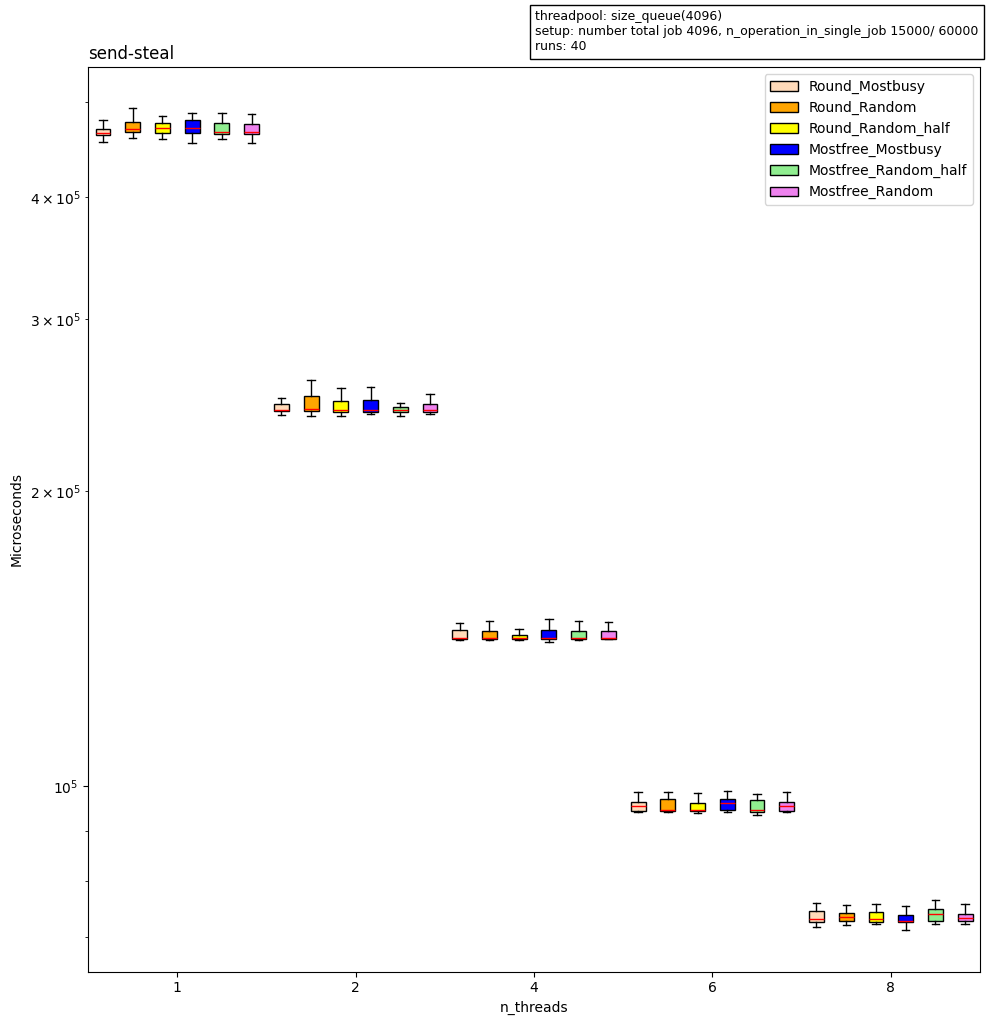


=== Median values for send-steal ===

Threads = 1
  Round_Mostbusy: 465419.50
  Round_Random: 469448.00
  Round_Random_half: 470444.00
  Mostfree_Mostbusy: 469859.50
  Mostfree_Random_half: 466443.50
  Mostfree_Random: 465511.50

Threads = 2
  Round_Mostbusy: 242413.50
  Round_Random: 243008.50
  Round_Random_half: 242116.00
  Mostfree_Mostbusy: 242337.50
  Mostfree_Random_half: 242144.00
  Mostfree_Random: 242049.00

Threads = 4
  Round_Mostbusy: 141648.50
  Round_Random: 141647.50
  Round_Random_half: 141532.50
  Mostfree_Mostbusy: 141661.00
  Mostfree_Random_half: 141656.00
  Mostfree_Random: 141756.50

Threads = 6
  Round_Mostbusy: 95330.50
  Round_Random: 94476.50
  Round_Random_half: 94464.00
  Mostfree_Mostbusy: 96171.50
  Mostfree_Random_half: 94536.00
  Mostfree_Random: 95425.00

Threads = 8
  Round_Mostbusy: 73097.50
  Round_Random: 73473.50
  Round_Random_half: 73181.00
  Mostfree_Mostbusy: 72848.00
  Mostfree_Random_half: 73987.50
  Mostfree_Random: 73316.50


In [28]:
labels = ["Round_Mostbusy","Round_Random","Round_Random_half","Mostfree_Mostbusy","Mostfree_Random_half","Mostfree_Random"]
multi_plot(
    round_mostbusy_multi,
    round_random_multi,
    round_random_half_multi,
    mostfree_mostbusy_multi,
    mostfree_random_half_multi,
    mostfree_random_multi,
    "send-steal",
    labels,
    n_threads
)
